### Regression - эффективность расхода топлива


В этом задании используется классический датасет Auto MPG. Необходимо построить модель, предсказывающую эффективность расхода топлива автомобилей конца 70-х и начала 80-х. В датасете представлено описание множества различных автомобилей того времени. В нём содержатся такие параметры как количество цилиндров, лошадиных сил, объем двигателя и вес.



Описание данных

* mpg - расход топлива
* cylinders - количество цилиндров
* displacement - смещение
* horsepower - лошадиные силы
* weight - вес
* acceleration - ускорение
* model year - год выпуска
* origin - страна (1 - USA, 2 - Europe, 3 - Japan)
* car name - наименование автомобиля

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !gdown https://drive.google.com/uc?id=1_MfiAd6ZPYmgvRqTY61EQL5Nl2LtfoOM

In [3]:
data = pd.read_csv('auto-mpg.csv')

In [4]:
data.shape

(398, 9)

In [5]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### Задание 1

Проведите анализ и визуализацию данных. А также реализуйте предварительную обработку данных - добавьте признак AGE возраст автомобиля (в предположении, что анализ проводится в 1985 году), а также удалите категориальные признаки.

### Решение

Добавляем признак AGE и удаляем признак MODEL YEAR

In [7]:
data['age'] = 85 - data['model year']
data = data.drop('model year', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   age           398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Также удалим название марок авто, предварительно сохранив их отдельно.

In [8]:
car_names = data['car name']
data = data.drop('car name', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    int64  
 7   age           398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Удалим записи с отсутствующим значением HORSEPOWER и приведем тип столбца к int64

In [9]:
data = data.drop(data[data['horsepower'] == '?'].index)
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    int64  
 7   age           392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


Превращаем мили/галлон в литры/100 км

In [10]:
koef = 3.785411784 / 1.609344 * 100
print(koef)
data['lkm'] = koef / data['mpg']
data = data.drop('mpg', axis = 1)
print(data.info())

235.2145833333333
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   origin        392 non-null    int64  
 6   age           392 non-null    int64  
 7   lkm           392 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 27.6 KB
None


Создадим удобные переменные

In [11]:
x = data.loc[:, data.columns != 'lkm'].to_numpy()
y = data['lkm'].values
feature_names = data.columns[:len(data.columns)-1]

Построим графики

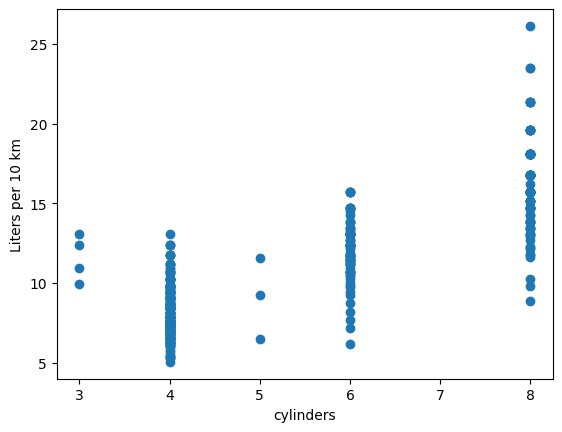

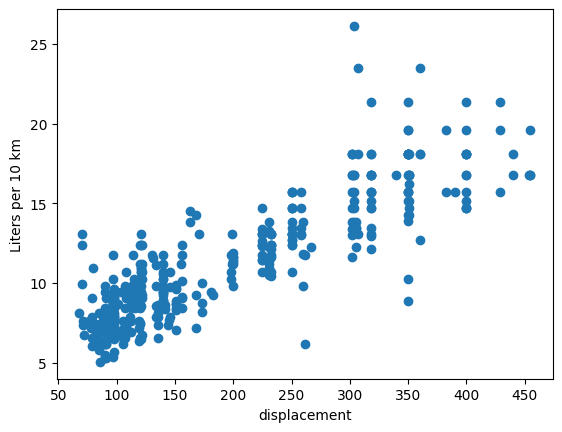

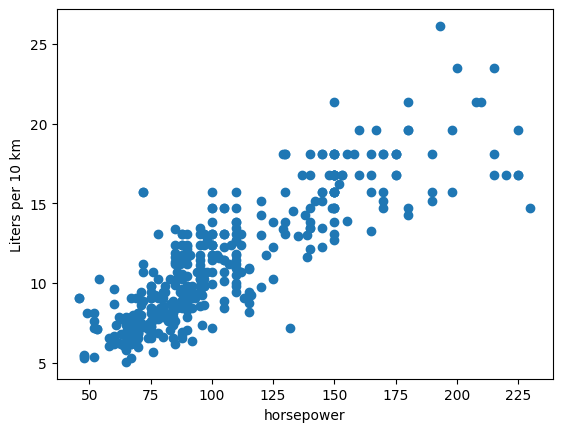

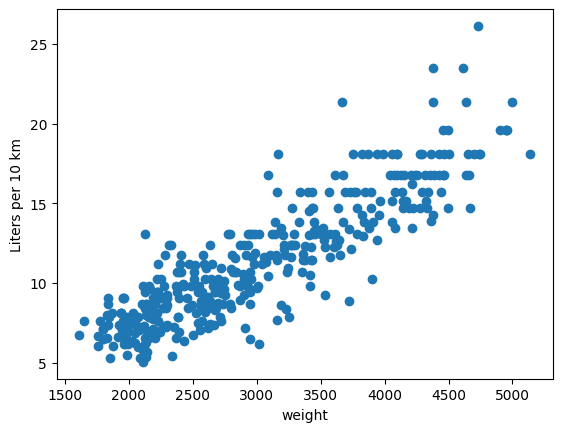

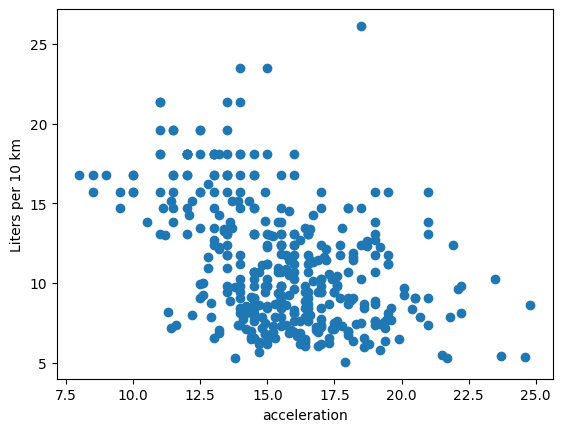

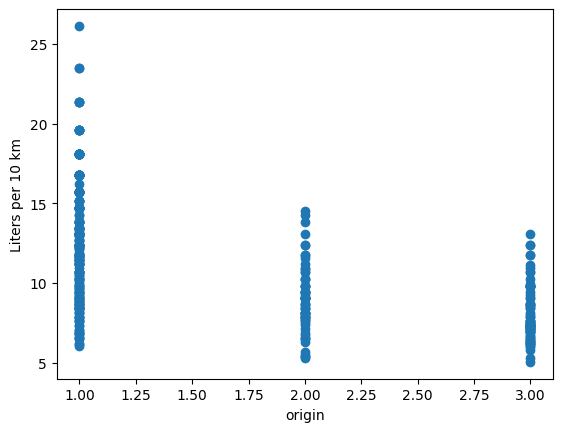

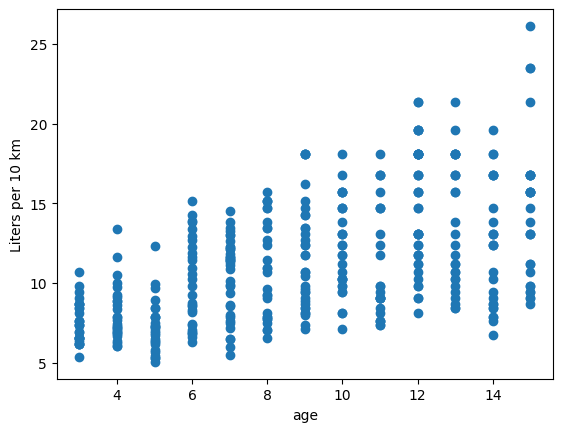

In [12]:
for index, feature_name in enumerate(feature_names):
    plt.figure()
    plt.scatter(x[:, index], y)
    plt.ylabel('Liters per 10 km')
    plt.xlabel(feature_name)

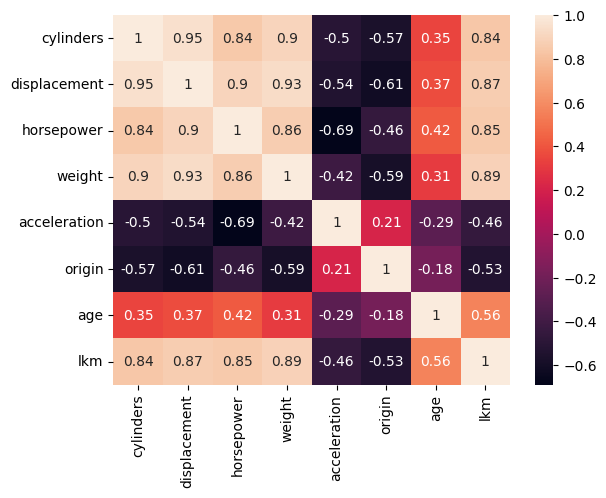

In [13]:
hm = sns.heatmap(data.corr(), annot=True)

In [14]:
data.corr()

,cylinders,displacement,horsepower,weight,acceleration,origin,age,lkm
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.568932,0.345647,0.839385
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.614535,0.369855,0.866050
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.455171,0.416361,0.854809
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.585005,0.309120,0.885056
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.212746,-0.290316,-0.456338
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,1.000000,-0.181528,-0.532932
age,0.345647,0.369855,0.416361,0.309120,-0.290316,-0.181528,1.000000,0.558255
lkm,0.839385,0.866050,0.854809,0.885056,-0.456338,-0.532932,0.558255,1.000000


Видим высокую корреляцию между cylinders, displacement, horsepower, weight, lkm. Все со всеми имеют корреляцию больше 0.84

Максимум имеем между cylinders и displacement (0.95)

### Задание 2

Реализуйте линейную регрессию - зависимость расхода топлива от мощности двигателя (количество лошадиных сил). Какая линейная зависимость получилась? Проведите анализ.

Импортируем регрессию

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

Генерируем данные для X и Y

In [16]:
Xhp = data[['horsepower']].values
y = data['lkm'].values

X_train, X_test, y_train, y_test = train_test_split(Xhp, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(274, 1)
(118, 1)


Обучаем и предсказываем

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# print('Slope: {:.2f}'.format(lr.coef_[0]))
# print('Intercept: {:.2f}'.format(lr.intercept_))

Построим диаграмму с корреляционной прямой

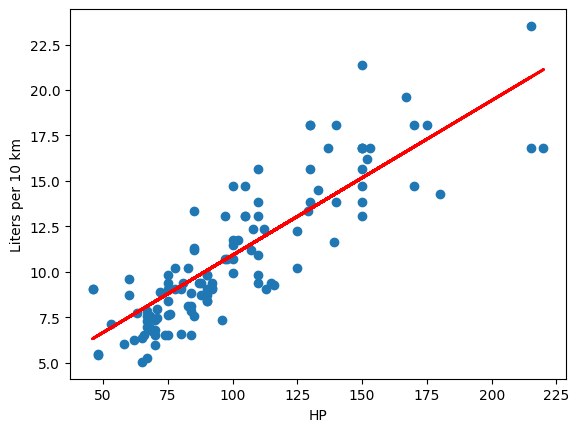

In [18]:
plt.scatter(X_test, y_test)
plt.xlabel('HP')
plt.ylabel('Liters per 10 km')
plt.plot(X_test, y_pred, color='red', linewidth=2)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

MAE: 1.592
MAPE: 0.156
MSE: 3.939
RMSE: 1.985


In [20]:
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

print(f'R2 train: {r2_train:.3f}')
print(f'R2  test: {r2_test:.3f}')

R2 train: 0.725
R2  test: 0.738


### Задание 3

Реализуйте множественную регрессию, при этом необходимо провести масштабирование признаков.

In [21]:
from sklearn.preprocessing import StandardScaler

df_train = data[feature_names.tolist()].values
df_test = data['lkm'].values

scaler = StandardScaler().fit(df_train)
df_train_scaled = scaler.transform(df_train)

X_train, X_test, y_train, y_test = train_test_split(df_train_scaled, df_test, test_size=0.3)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

Посчитаем метрики

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')

MAE: 1.127
MAPE: 0.097
MSE: 2.478
RMSE: 1.574


In [23]:
r2_train = mlr.score(X_train, y_train)
r2_test = mlr.score(X_test, y_test)

print(f'R2 train: {r2_train:.5f}')
print(f'R2  test: {r2_test:.5f}')

R2 train: 0.89775
R2  test: 0.85753


Оценим значимость признаков

In [24]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame(zip(mlr.coef_, np.abs(mlr.coef_), feature_names.tolist()),
    columns=['coef', 'abs_coef', 'feature_name'])
coef_df.sort_values(by='abs_coef', ascending=False, inplace=True)
print(coef_df)

       coef  abs_coef  feature_name
3  2.273490  2.273490        weight
2  1.171412  1.171412    horsepower
6  1.166080  1.166080           age
1 -0.612503  0.612503  displacement
0  0.400469  0.400469     cylinders
4  0.259886  0.259886  acceleration
5 -0.209660  0.209660        origin


### Задание 4
Выполните регуляризацию модели разными способами и оцените её качество. 

### Ridge

In [56]:
import copy

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(df_train_scaled, df_test, test_size=0.3)

alpha_koef = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 0.9, 1]
dft = list()

for alpha in alpha_koef:
    rdg = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred = rdg.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # print(f'MAE: {mae:.3f}')
    # print(f'MAPE: {mape:.3f}')
    # print(f'MSE: {mse:.3f}')
    # print(f'RMSE: {rmse:.3f}')
    r2_train = rdg.score(X_train, y_train)
    r2_test = rdg.score(X_test, y_test)

    # print(f'R2 train: {r2_train:.5f}')
    # print(f'R2  test: {r2_test:.5f}')

    dft.append(copy.deepcopy([alpha, mae, mape, mse, rmse, r2_train, r2_test]))

df = pd.DataFrame(dft, columns=['alpha_koef', 'mae', 'mape', 'mse', 'rmse', 'r2_train', 'r2_test'])
df.sort_values(by=['r2_test'], ascending=False, inplace=True)
print(df)

    alpha_koef       mae      mape       mse      rmse  r2_train   r2_test
10     1.00000  0.977244  0.089819  1.740208  1.319169  0.884226  0.885583
9      0.90000  0.977541  0.089846  1.740780  1.319386  0.884236  0.885545
8      0.80000  0.977840  0.089874  1.741367  1.319609  0.884246  0.885507
7      0.40000  0.979052  0.089985  1.743857  1.320552  0.884274  0.885343
6      0.20000  0.979667  0.090041  1.745195  1.321058  0.884282  0.885255
5      0.10000  0.979978  0.090070  1.745889  1.321321  0.884284  0.885209
4      0.01000  0.980258  0.090096  1.746529  1.321563  0.884285  0.885167
3      0.00100  0.980287  0.090099  1.746593  1.321587  0.884285  0.885163
2      0.00010  0.980289  0.090099  1.746600  1.321590  0.884285  0.885163
1      0.00001  0.980290  0.090099  1.746601  1.321590  0.884285  0.885163
0      0.00000  0.980290  0.090099  1.746601  1.321590  0.884285  0.885162


### Lasso

### Задание 5

Проведите оценку и сравнительный анализ результатов. Какие признаки являются значимыми?

In [ ]:
#здесь засунуть в датафрейм  model.coef и вывести в порядке убывания вооот.


# psa sklearn.Decomposition (тут тестить количество компонентов)